In [1]:
from IPython.display import HTML,Image
import datetime
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.dummy import DummyClassifier,DummyRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier,XGBRegressor
from wordcloud import WordCloud,STOPWORDS
import plotly
import cufflinks as cf
cf.go_offline()
sns.set_style('whitegrid')
%matplotlib inline

/Users/suyashchavan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [27]:
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
df = pd.read_csv('movies_metadata.csv')

/Users/suyashchavan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

#### Features

__adult__: Indicates if the movie is X-Rated or Adult.

__belongs_to_collection__: A stringified dictionary that gives information on the movie series the particular film belongs to.

__budget__: The budget of the movie in dollars.

__genres__: A stringified list of dictionaries that list out all the genres associated with the movie.

__homepage__: The Official Homepage of the move.

__id__: The ID of the move.

__imdb_id__: The IMDB ID of the movie.

__original_language__: The language in which the movie was originally shot in.

__original_title__: The original title of the movie.

__overview__: A brief blurb of the movie.

__popularity__: The Popularity Score assigned by TMDB.

__poster_path__: The URL of the poster image.

__production_companies__: A stringified list of production companies involved with the making of the movie.

__production_countries__: A stringified list of countries where the movie was shot/produced in.

__release_date__: Theatrical Release Date of the movie.

__revenue__: The total revenue of the movie in dollars.

__runtime__: The runtime of the movie in minutes.

__spoken_languages__: A stringified list of spoken languages in the film.

__status__: The status of the movie (Released, To Be Released, Announced, etc.)

__tagline__: The tagline of the movie.

__title__: The Official Title of the movie.

__video__: Indicates if there is a video present of the movie with TMDB.

__vote_average__: The average rating of the movie.

__vote_count__: The number of votes by users, as counted by TMDB.

In [5]:
df.shape

(45466, 24)

__So the dataset has total 45466 number of movies__

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

##### There are a total of 45,466 movies with 24 features. Most of the features have very few NaN values (apart from homepage and tagline). We will attempt at cleaning this dataset to a form suitable for analysis in the next section.

In [7]:
df = df.drop(['imdb_id'], axis=1)

In [8]:
len(df[df['original_title'] != df['title'] ][['original_title','title','release_date']])

11402

There are total 11402 movies whose original title and english title is different, I am going to drop original title feature

In [9]:
df = df.drop('original_title',axis=1)

In [10]:
df[df['revenue']==0].shape

(38052, 22)

There are total 38052 movies with zero revenue, but for most movies revenue data is not available, so replacing them with np.nan

In [11]:
df['revenue'] =  df['revenue'].replace(0,np.nan)

In [12]:
df['budget'] = pd.to_numeric(df['budget'],errors='coerce')
df['budget'] = df['budget'].replace(0,np.nan)
df['budget'].isnull().sum()

36576

There are total 36576 movies whose budget is not known

__We add following 2 features to dataset__<br>
__1.Year__ : release year<br>
__2.Return__: Revenue/Budget

In [13]:
df['return'] = df['revenue']/df['budget']
df['return'].isnull().sum()

40085

There are total 40085 movies whose either budget or revenue information is not available.

In [14]:
df['year'] = df['release_date'].apply(lambda x : str(x).split('-')[0] if x != np.nan else np.nan)

In [15]:
df['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 - Written by Ørnås                                                                                                                   1
Name: adult, dtype: int64

In whole database there are only 9 movies which are adult movies, so its better to remove that column

In [16]:
df = df.drop('adult',axis=1)

In [17]:
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
df['poster_path'] = "<img src='" + base_poster_url + df['poster_path'] + "' style='height:100px;'>"

# Exploratory Data Analysis

### Title and overview analysis

In [18]:
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype(str)

In [19]:
title_corpus = ''.join(df['title'])
overview_corpus = ''.join(df['overview'])

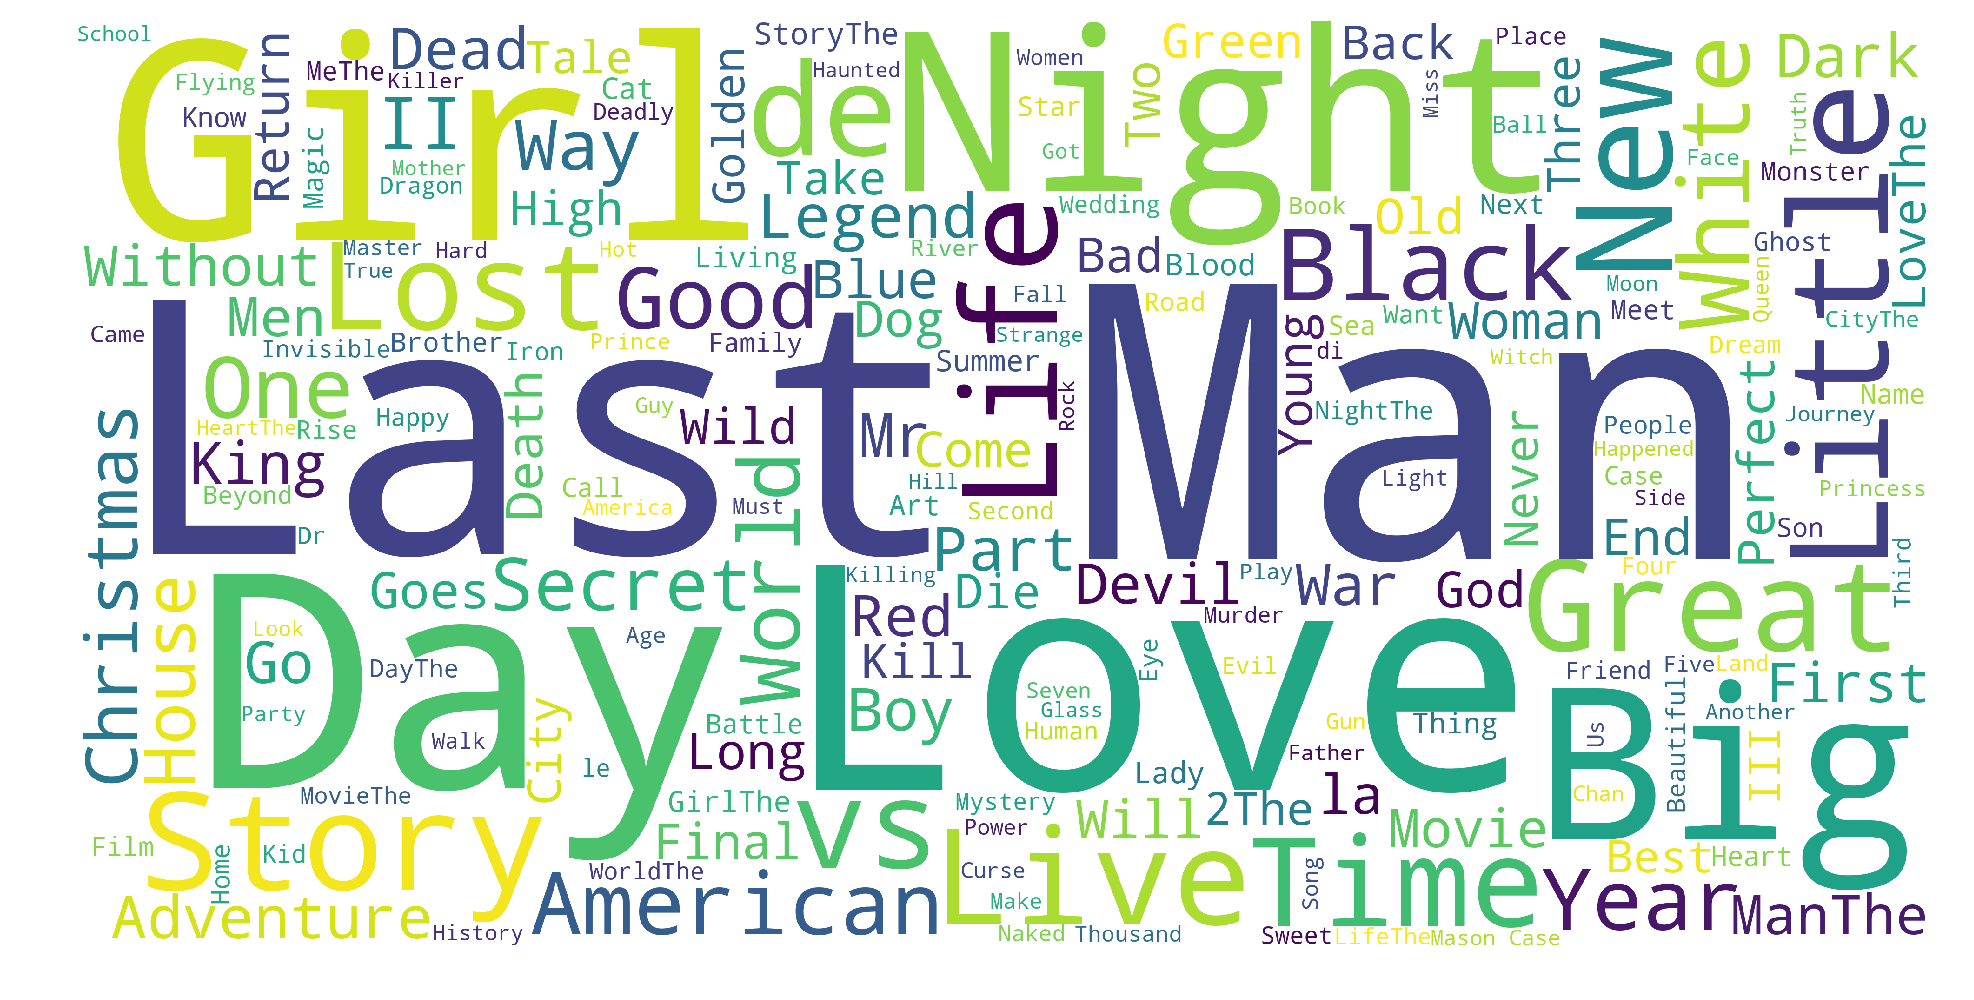

In [20]:
title_wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',height=2000,width=4000)
title_wordcloud = title_wordcloud.generate(title_corpus)
plt.figure(figsize=(16,10),dpi=150)
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

## Words 'Love, Last, Man, Day,Girl,Night, Big are among the most commonly occuring words in films titles 

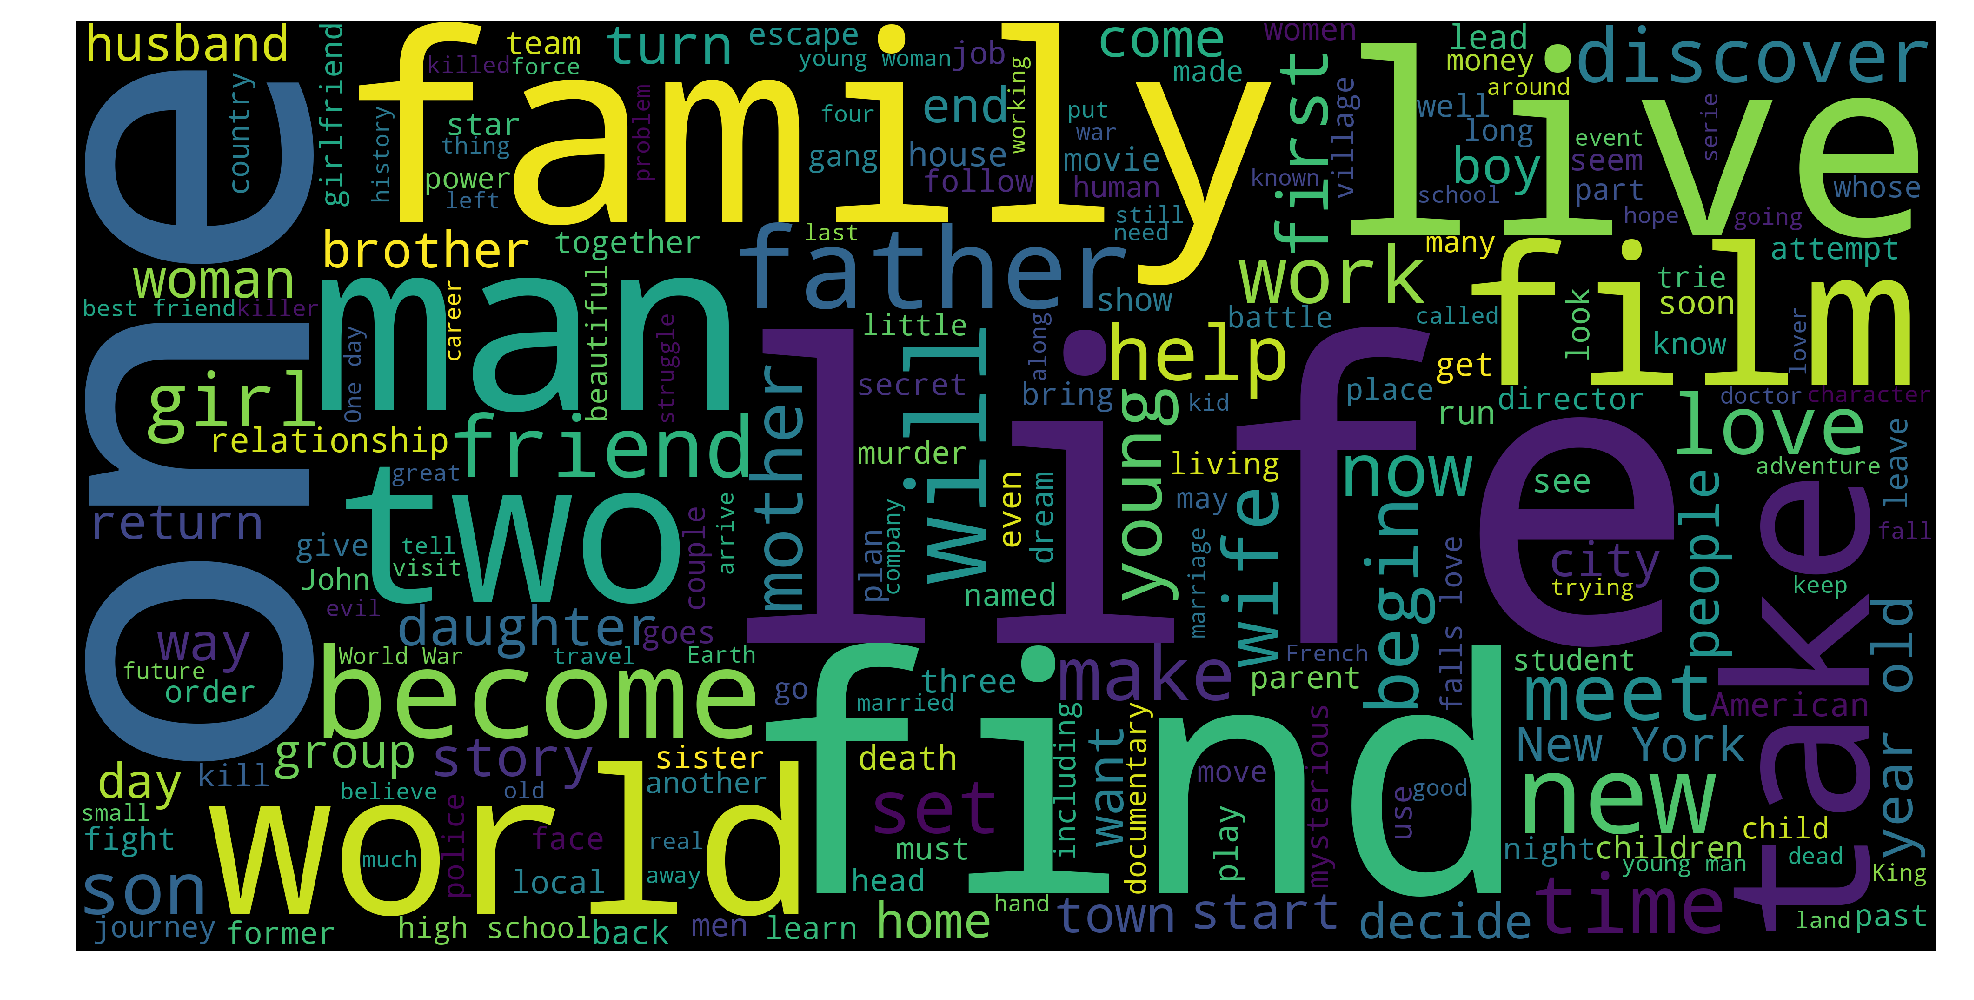

In [21]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS,height=2000,width=4000).generate(overview_corpus)
plt.figure(figsize=(16,10),dpi=150)
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

### Production countries

In [22]:
df['production_countries'][4],type(df['production_countries'][4])

("[{'iso_3166_1': 'US', 'name': 'United States of America'}]", str)

### as we can see its a string , not list, We need to retrive item in name key

In [23]:
df['production_countries'] =  df['production_countries'].fillna('[]').apply(ast.literal_eval)

In [24]:
df['production_countries'] = df['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [25]:
df['production_countries'][4],type(df['production_countries'][4])

(['United States of America'], list)

In [26]:
s = df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'
con_df = df.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(10)

,num_movies,country
0,21153,United States of America
1,4094,United Kingdom
2,3940,France
3,2254,Germany
4,2169,Italy
5,1765,Canada
6,1648,Japan
7,964,Spain
8,912,Russia
9,828,India


__With no surprise, USA is Leading country in terms of country where movies are made__

In [28]:
con_df_without_usa = con_df[con_df['country'] != 'United States of America']

In [29]:
data = dict(type='choropleth',
           locations=con_df_without_usa['country'],
           locationmode = 'country names',
           z=con_df_without_usa['num_movies'],
           colorscale = [[0,'rgb(255, 255, 255)'],[1,'rgb(255, 0, 0)']],
           autocolorscale = False,
           reversescale = False,
           text=con_df_without_usa['country'],
           colorbar={'title':'Production Countries'})
layout = dict(title='Production Countries for the MovieLens Movies (Apart from US)',
             geo = dict(showframe=False,
             projection={'type':'mercator'}))

In [30]:
choromap = go.Figure(data=[data],layout=layout)

In [31]:
iplot(choromap)

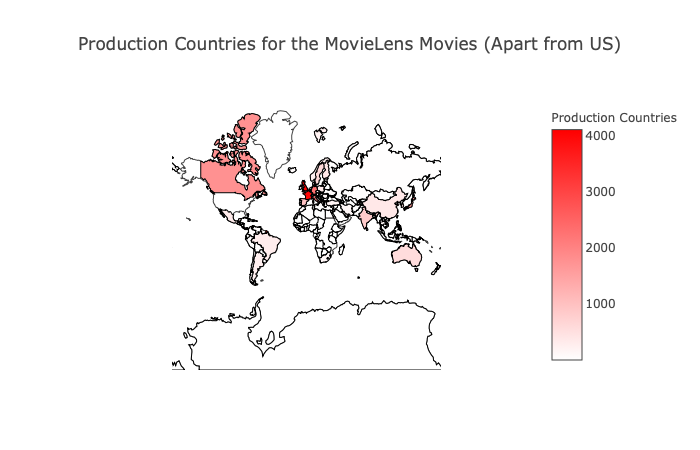

In [33]:
Image(filename='newplot-5.png')            #Github does not support Iplot

###  Movie Franchise

In [34]:
df_fran = df[df['belongs_to_collection'].notnull()]

In [35]:
df_fran['belongs_to_collection'] = df_fran['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x:x['name'] if isinstance(x,dict) else np.nan)

In [36]:
df_fran = df_fran[df_fran['belongs_to_collection'].notnull()]

In [37]:
fran_pivot = df_fran.pivot_table(index='belongs_to_collection', values='revenue', 
                                 aggfunc={'revenue': ['mean', 'sum', 'count']}).reset_index()

### Highest grossing movie franchise

In [38]:
fran_pivot.sort_values('sum',ascending=False).head(10)

,belongs_to_collection,count,mean,sum
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
646,James Bond Collection,26,2.733450e+08,7.106970e+09
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09
1550,Transformers Collection,5,8.732202e+08,4.366101e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
1491,The Twilight Collection,5,6.684215e+08,3.342107e+09
610,Ice Age Collection,5,6.433417e+08,3.216709e+09
666,Jurassic Park Collection,4,7.578710e+08,3.031484e+09


### Harry potter is best franchise when it comes to total revenue collection, today Stars wars would have been best one, but Star wars: The Last Jedi was not released when this data was collected.

### Most successful movie franchise by average box office collection

In [39]:
fran_pivot.sort_values('mean',ascending=False).head(10)

,belongs_to_collection,count,mean,sum
112,Avatar Collection,1,2.787965e+09,2.787965e+09
1245,The Avengers Collection,2,1.462481e+09,2.924962e+09
479,Frozen Collection,1,1.274219e+09,1.274219e+09
446,Finding Nemo Collection,2,9.844532e+08,1.968906e+09
1352,The Hobbit Collection,3,9.785078e+08,2.935523e+09
1388,The Lord of the Rings Collection,3,9.721816e+08,2.916545e+09
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09


### Even Though Avatar collection has only one movie, they are planning to release total 5 movies till 2027, so it will be interesting to see the next movie will perform same as the first one at box office, as for present avengers movie has been smashing at office and they can take over Avatar

### Franchise with highest number of movies

In [40]:
fran_pivot.sort_values('count',ascending=False).head(10)

,belongs_to_collection,count,mean,sum
646,James Bond Collection,26,2.733450e+08,7.106970e+09
473,Friday the 13th Collection,12,3.874155e+07,4.648985e+08
976,Pokémon Collection,11,6.348189e+07,6.983008e+08
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
540,Halloween Collection,8,3.089601e+07,2.471681e+08
29,A Nightmare on Elm Street Collection,8,4.544894e+07,3.635916e+08
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
1432,The Pink Panther (Original) Collection,8,2.055978e+07,1.644782e+08
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
977,Police Academy Collection,7,4.352046e+07,3.046432e+08


__Is it even a doubt, James Bond series rules this list, they are making James bond movies from 60 years now, first one Dr.No was released in 1962,and last one was released in 2015, Spectre__

## Production Companies

In [41]:
df['production_companies'][0]

"[{'name': 'Pixar Animation Studios', 'id': 3}]"

In [42]:
df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)

In [43]:
df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x,list) else [])

In [44]:
df.head(5)['production_companies']

0                            [Pixar Animation Studios]
1    [TriStar Pictures, Teitler Film, Interscope Co...
2                       [Warner Bros., Lancaster Gate]
3             [Twentieth Century Fox Film Corporation]
4         [Sandollar Productions, Touchstone Pictures]
Name: production_companies, dtype: object

In [45]:
s= df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies' 

In [46]:
com_df = df.drop('production_companies',axis=1).join(s)

In [47]:
com_sum = pd.DataFrame(com_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns=['Total Revenue']
com_mean = pd.DataFrame(com_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average Revenue']
com_count = pd.DataFrame(com_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number of Movies']
com_pivot = pd.concat([com_sum , com_mean, com_count],axis=1).sort_values('Total Revenue',ascending=False)
com_pivot.head(10)

/Users/suyashchavan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,Total Revenue,Average Revenue,Number of Movies
Warner Bros.,6.352519e+10,1.293792e+08,491
Universal Pictures,5.525919e+10,1.193503e+08,463
Paramount Pictures,4.880819e+10,1.235650e+08,395
Twentieth Century Fox Film Corporation,4.768775e+10,1.398468e+08,341
Walt Disney Pictures,4.083727e+10,2.778046e+08,147
Columbia Pictures,3.227974e+10,1.367785e+08,236
New Line Cinema,2.217339e+10,1.119868e+08,198
Amblin Entertainment,1.734372e+10,2.550547e+08,68
DreamWorks SKG,1.547575e+10,1.984071e+08,78
Dune Entertainment,1.500379e+10,2.419966e+08,62


#### Warner Bros is the highest earning production company of all time earning a staggering 63.5 billion dollars from close to 500 movies. Universal Pictures and Paramaount Pictures are the second and the third highest earning companies with 55 billion dollars and 48 billion dollars in revenue respectively.

### Most successful by average revenue

In [48]:
com_pivot[com_pivot['Number of Movies'] > 15].sort_values('Average Revenue',ascending=False).head(10)

,Total Revenue,Average Revenue,Number of Movies
Pixar Animation Studios,1.118853e+10,6.215852e+08,18
Marvel Studios,1.169964e+10,6.157703e+08,19
Lucasfilm,9.898421e+09,4.499282e+08,22
DreamWorks Animation,1.370752e+10,4.031622e+08,34
DC Entertainment,6.212609e+09,3.882880e+08,16
Dentsu,6.853205e+09,3.807336e+08,18
Jerry Bruckheimer Films,8.957441e+09,3.732267e+08,24
Marvel Enterprises,6.538067e+09,3.441088e+08,19
Legendary Pictures,1.346866e+10,3.367166e+08,40
1492 Pictures,5.470574e+09,3.217985e+08,17


#### Pixar is most successful production house with every movie generating  $621 millions on average

## Original Language

##### In this section, let us look at the languages of the movies in our dataset. From the production countries, we have already deduced that the majority of the movies in the dataset are English. Let us see what the other major languages represented are.

In [49]:
df['original_language'].drop_duplicates().shape[0]

93

##### There are total 93 languages featured in the dataset

In [75]:
language_df = pd.DataFrame(df['original_language'].value_counts())
language_df.head(10)

,original_language
en,32269
fr,2438
it,1529
ja,1350
de,1080
es,994
ru,826
hi,508
ko,444
zh,409


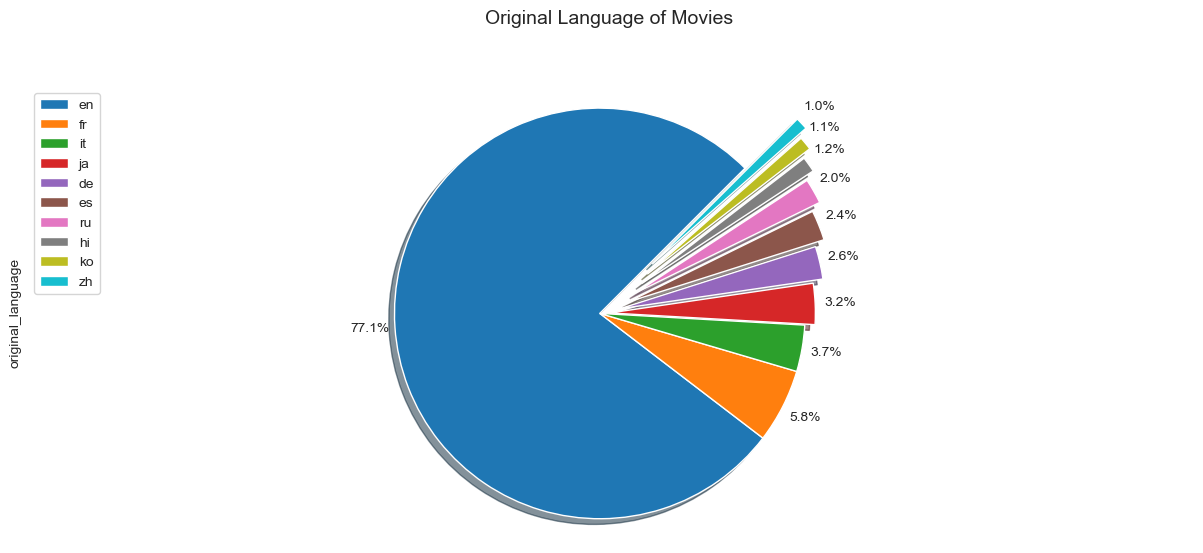

In [85]:
explode_list=[0,0,0,0.05,0.1,0.15,0.2,0.25,0.3,0.35]
plt.figure(dpi=100)
language_df.head(10)['original_language'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=45,    
                            shadow=True,       
                            labels=None,        
                            pctdistance=1.12,   
                             explode=explode_list )
                            
plt.title('Original Language of Movies', y=1.12,fontsize=14) 
plt.axis('equal') 
plt.legend(labels=language_df.head(10).index, loc='upper left',fontsize=10) 

plt.show()

As We can see English language clearly dominates the list

## Popularity, Vote Average and Vote Count

In [86]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [87]:
df['popularity'] = df['popularity'].apply(clean_numeric)
df['vote_count'] = df['vote_count'].apply(clean_numeric)
df['vote_average'] = df['vote_average'].apply(clean_numeric)

In [88]:
df.popularity.describe()

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

In [90]:
popular= df[['poster_path','title','year','popularity']].sort_values('popularity',ascending=False).head(10)
pd.set_option('display.max_colwidth', 100)
HTML(popular.to_html(escape=False))

,poster_path,title,year,popularity
30700,,Minions,2015,547.488298
33356,,Wonder Woman,2017,294.337037
42222,,Beauty and the Beast,2017,287.253654
43644,,Baby Driver,2017,228.032744
24455,,Big Hero 6,2014,213.849907
26564,,Deadpool,2016,187.860492
26566,,Guardians of the Galaxy Vol. 2,2017,185.330992
14551,,Avatar,2009,185.070892
24351,,John Wick,2014,183.870374
23675,,Gone Girl,2014,154.801009


#### Minions is the most popular movie by the TMDB Popularity Score. Wonder Woman and Beauty and the Beast, two extremely successful woman centric movies come in second and third respectively.

### Most voted

In [91]:
voted =df[['poster_path','title','year','vote_count']].sort_values('vote_count',ascending=False).head(10)
HTML(voted.to_html(escape=False))

,poster_path,title,year,vote_count
15480,,Inception,2010,14075.0
12481,,The Dark Knight,2008,12269.0
14551,,Avatar,2009,12114.0
17818,,The Avengers,2012,12000.0
26564,,Deadpool,2016,11444.0
22879,,Interstellar,2014,11187.0
20051,,Django Unchained,2012,10297.0
23753,,Guardians of the Galaxy,2014,10014.0
2843,,Fight Club,1999,9678.0
18244,,The Hunger Games,2012,9634.0


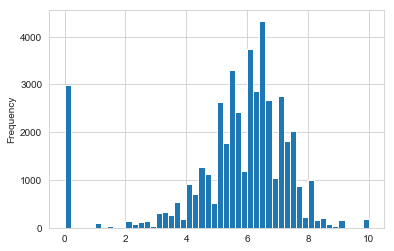

In [92]:
df['vote_average'].plot(kind='hist',bins=50)

Most of the movies have vote average between 5 to 8

### Most critically accaimed movies

In [93]:
ca= df[['poster_path','title','vote_average','year','vote_count']].sort_values('vote_average',ascending=False).head(10)
HTML(ca.to_html(escape=False))

,poster_path,title,vote_average,year,vote_count
21642,,Ice Age Columbus: Who Were the First Americans?,10.0,2005,1.0
15710,,If God Is Willing and da Creek Don't Rise,10.0,2010,1.0
22396,,Meat the Truth,10.0,2008,1.0
22395,,Marvin Hamlisch: What He Did For Love,10.0,2013,1.0
35343,,Elaine Stritch: At Liberty,10.0,2002,1.0
186,,Reckless,10.0,1995,1.0
45047,,The Human Surge,10.0,2016,1.0
22377,,The Guide,10.0,2011,1.0
22346,,هیچ کجا هیچ کس,10.0,2013,1.0
1634,,Other Voices Other Rooms,10.0,1995,1.0


### Issue with above list is that vote count is only 1, so they are actually voted by only 1 viewer and they happen to like to the movie. So we need to set a lower threshold for vote count

In [96]:
ca =df[df['vote_count']>2000][['poster_path','title','year','vote_average','vote_count']].sort_values('vote_average',ascending=False).head(10)
HTML(ca.to_html(escape=False))

,poster_path,title,year,vote_average,vote_count
314,,The Shawshank Redemption,1994,8.5,8358.0
834,,The Godfather,1972,8.5,6024.0
2211,,Life Is Beautiful,1997,8.3,3643.0
5481,,Spirited Away,2001,8.3,3968.0
1152,,One Flew Over the Cuckoo's Nest,1975,8.3,3001.0
1176,,Psycho,1960,8.3,2405.0
2843,,Fight Club,1999,8.3,9678.0
1178,,The Godfather: Part II,1974,8.3,3418.0
12481,,The Dark Knight,2008,8.3,12269.0
292,,Pulp Fiction,1994,8.3,8670.0


Now, who will argue these are not the mosr critically accaimed movies<br>
The Shawshank Redemption and The Godfather are the two most critically acclaimed movies in the TMDB Database. Interestingly, they are the top 2 movies in IMDB's Top 250 Movies list too. They have a rating of over 9 on IMDB as compared to their 8.5 TMDB Scores.

### Is there a relation between popularity and vote_average

/Users/suyashchavan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/Users/suyashchavan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



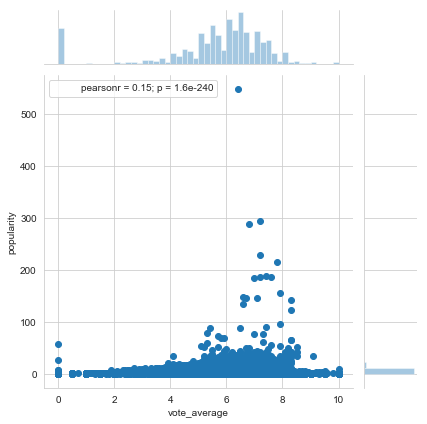

In [97]:
j= sns.jointplot(x='vote_average',y = 'popularity',data=df)
j.annotate(stats.pearsonr)
plt.show()

##### Since the pearsonr coeficient is 0.15 there is no tangible relation between them

/Users/suyashchavan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



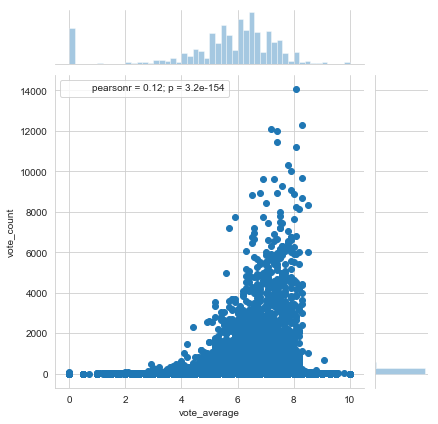

In [98]:
j = sns.jointplot(x='vote_average',y='vote_count',data=df)
j.annotate(stats.pearsonr)
plt.show()

#### Low pearsonr coefficient shows that high vote count doesnt imply movie is good

## Movie release dates

In [99]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
               'November', 'December']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [100]:
def get_month(x):
    try:
        date = pd.to_datetime(x)
        month = date.month_name()
        
        return month
    except:
        return np.nan

In [101]:
df['release_month'] =df['release_date'].apply(get_month)

In [102]:
def get_day(x):
    try:
        date = pd.to_datetime(x)
        day = date.day_name()
        
        return day
    except:
        return np.nan
    

In [103]:
df['day_of_week'] = df['release_date'].apply(get_day)

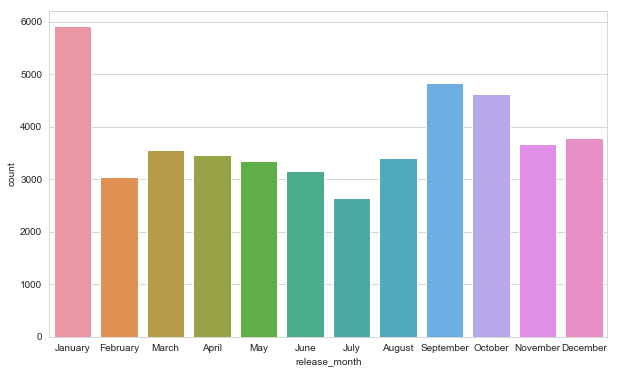

In [104]:
plt.figure(figsize=(10,6))
sns.countplot(x='release_month',data=df,order=month_order)

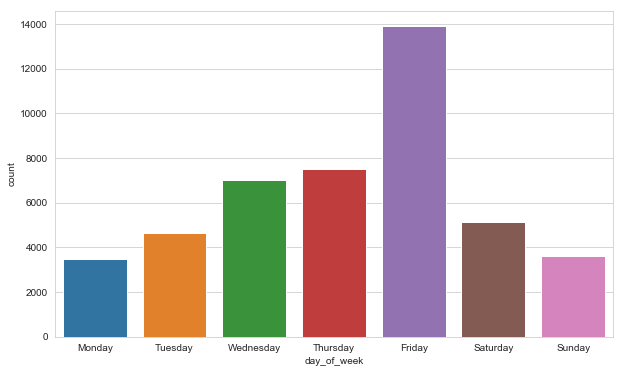

In [105]:
plt.figure(figsize=(10,6))
sns.countplot(x='day_of_week',data=df,order=day_order)

### Clearly it can be seen that highest number of movies are released on friday

(0, 12)

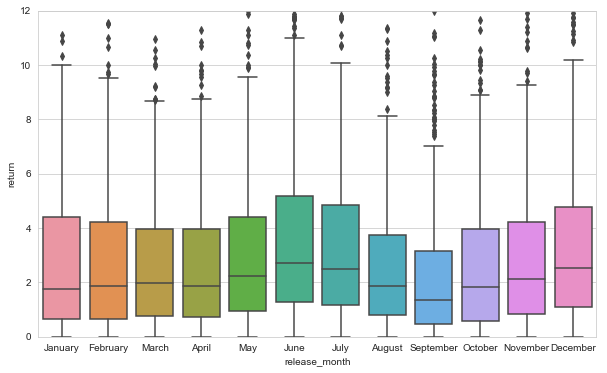

In [112]:
plt.figure(figsize=(10,6))
sns.boxplot(x='release_month',y='return',data=df[df['return'].notnull()],order=month_order)
plt.ylim([0,12])

(0, 12)

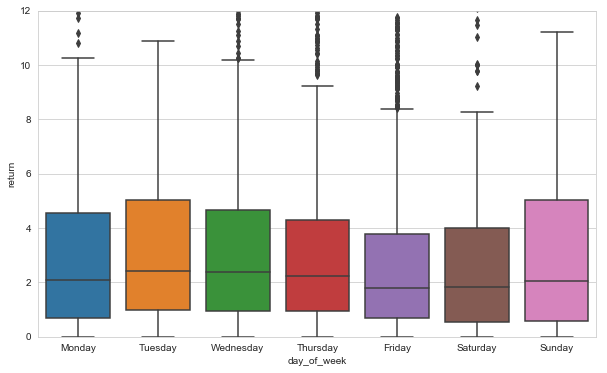

In [113]:
plt.figure(figsize=(10,6))
sns.boxplot(x='day_of_week',y='return',data=df[df['return'].notnull()],order=day_order)
plt.ylim([0,12])

In [116]:
year_count = df.groupby('year')['title'].count()
year_count.iplot(xrange=(1900,2020))

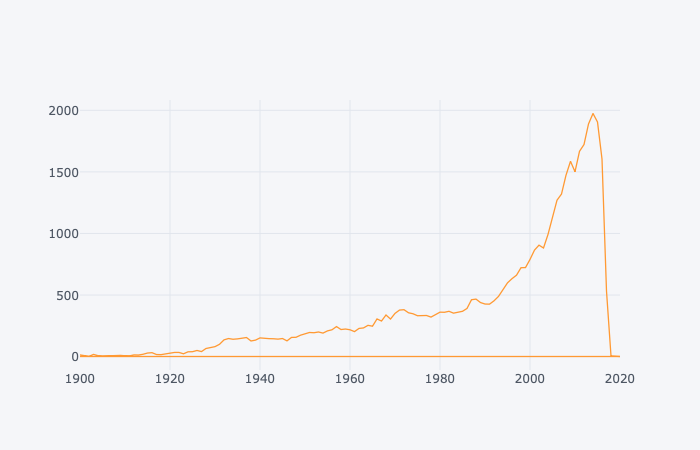

In [117]:
Image(filename='newplot-6.png')

In [121]:
j=df[(df['year'] != 'nan') & (df['year'] != '1')].sort_values('year',ascending=True)[['poster_path','title','year']].head(10)
HTML(j.to_html(escape=False))

,poster_path,title,year
29503,<img src='http://image.tmdb.org/t/p/w185/Mardock Scramble: The Third Exhaust' style='height:100p...,nan,12
34940,,Passage of Venus,1874
34937,,Sallie Gardner at a Gallop,1878
41602,,Buffalo Running,1883
34933,,Man Walking Around a Corner,1887
34934,,Accordion Player,1888
34938,,Traffic Crossing Leeds Bridge,1888
34935,,"Monkeyshines, No. 1",1890
34936,,"Monkeyshines, No. 2",1890
34939,,London's Trafalgar Square,1890


#### These are collection of photos

In [122]:
df_21 = df.copy()
df_21['year']  = df_21['year'].apply(lambda x: int(x) if len(x)==4  else np.nan)
df_21 = df_21[df_21['year']>2000.0]
df_21['year'].value_counts()

2014.0    1974
2015.0    1905
2013.0    1889
2012.0    1722
2011.0    1667
2016.0    1604
2009.0    1586
2010.0    1501
2008.0    1473
2007.0    1320
2006.0    1270
2005.0    1125
2004.0     992
2002.0     905
2003.0     882
2001.0     865
2017.0     532
2018.0       5
2020.0       1
Name: year, dtype: int64

In [124]:
heat = pd.pivot_table(data=df_21,values='title',columns='year',index='release_month',aggfunc='count')
heat= heat.reindex(month_order)
heat = heat.fillna(0)
heat

year,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2020.0
release_month,,,,,,,,,,,,,,,,,,,
January,159.0,163.0,141.0,170.0,184.0,171.0,206.0,242.0,231.0,173.0,157.0,142.0,160.0,158.0,171.0,144.0,89.0,0.0,0.0
February,48.0,55.0,53.0,69.0,58.0,69.0,92.0,111.0,124.0,107.0,107.0,100.0,124.0,134.0,141.0,133.0,72.0,0.0,0.0
March,67.0,71.0,61.0,69.0,86.0,112.0,94.0,96.0,113.0,95.0,134.0,163.0,160.0,165.0,157.0,143.0,93.0,1.0,0.0
April,55.0,52.0,66.0,68.0,84.0,94.0,94.0,90.0,129.0,105.0,138.0,121.0,162.0,206.0,171.0,163.0,77.0,2.0,0.0
May,43.0,69.0,78.0,79.0,88.0,77.0,102.0,75.0,100.0,127.0,95.0,121.0,121.0,141.0,139.0,115.0,68.0,0.0,0.0
June,54.0,63.0,55.0,60.0,80.0,103.0,95.0,85.0,94.0,115.0,106.0,124.0,132.0,134.0,149.0,115.0,66.0,0.0,0.0
July,40.0,47.0,46.0,52.0,68.0,66.0,71.0,93.0,75.0,81.0,103.0,90.0,122.0,112.0,125.0,107.0,33.0,0.0,0.0
August,68.0,55.0,80.0,63.0,69.0,92.0,97.0,124.0,110.0,104.0,102.0,148.0,144.0,174.0,157.0,115.0,18.0,0.0,0.0
September,109.0,98.0,104.0,125.0,144.0,160.0,165.0,164.0,190.0,173.0,247.0,238.0,232.0,241.0,198.0,170.0,4.0,0.0,0.0


In [125]:
for i in heat.columns:
    
    heat[i] = heat[i].apply(lambda x:int(x))
    

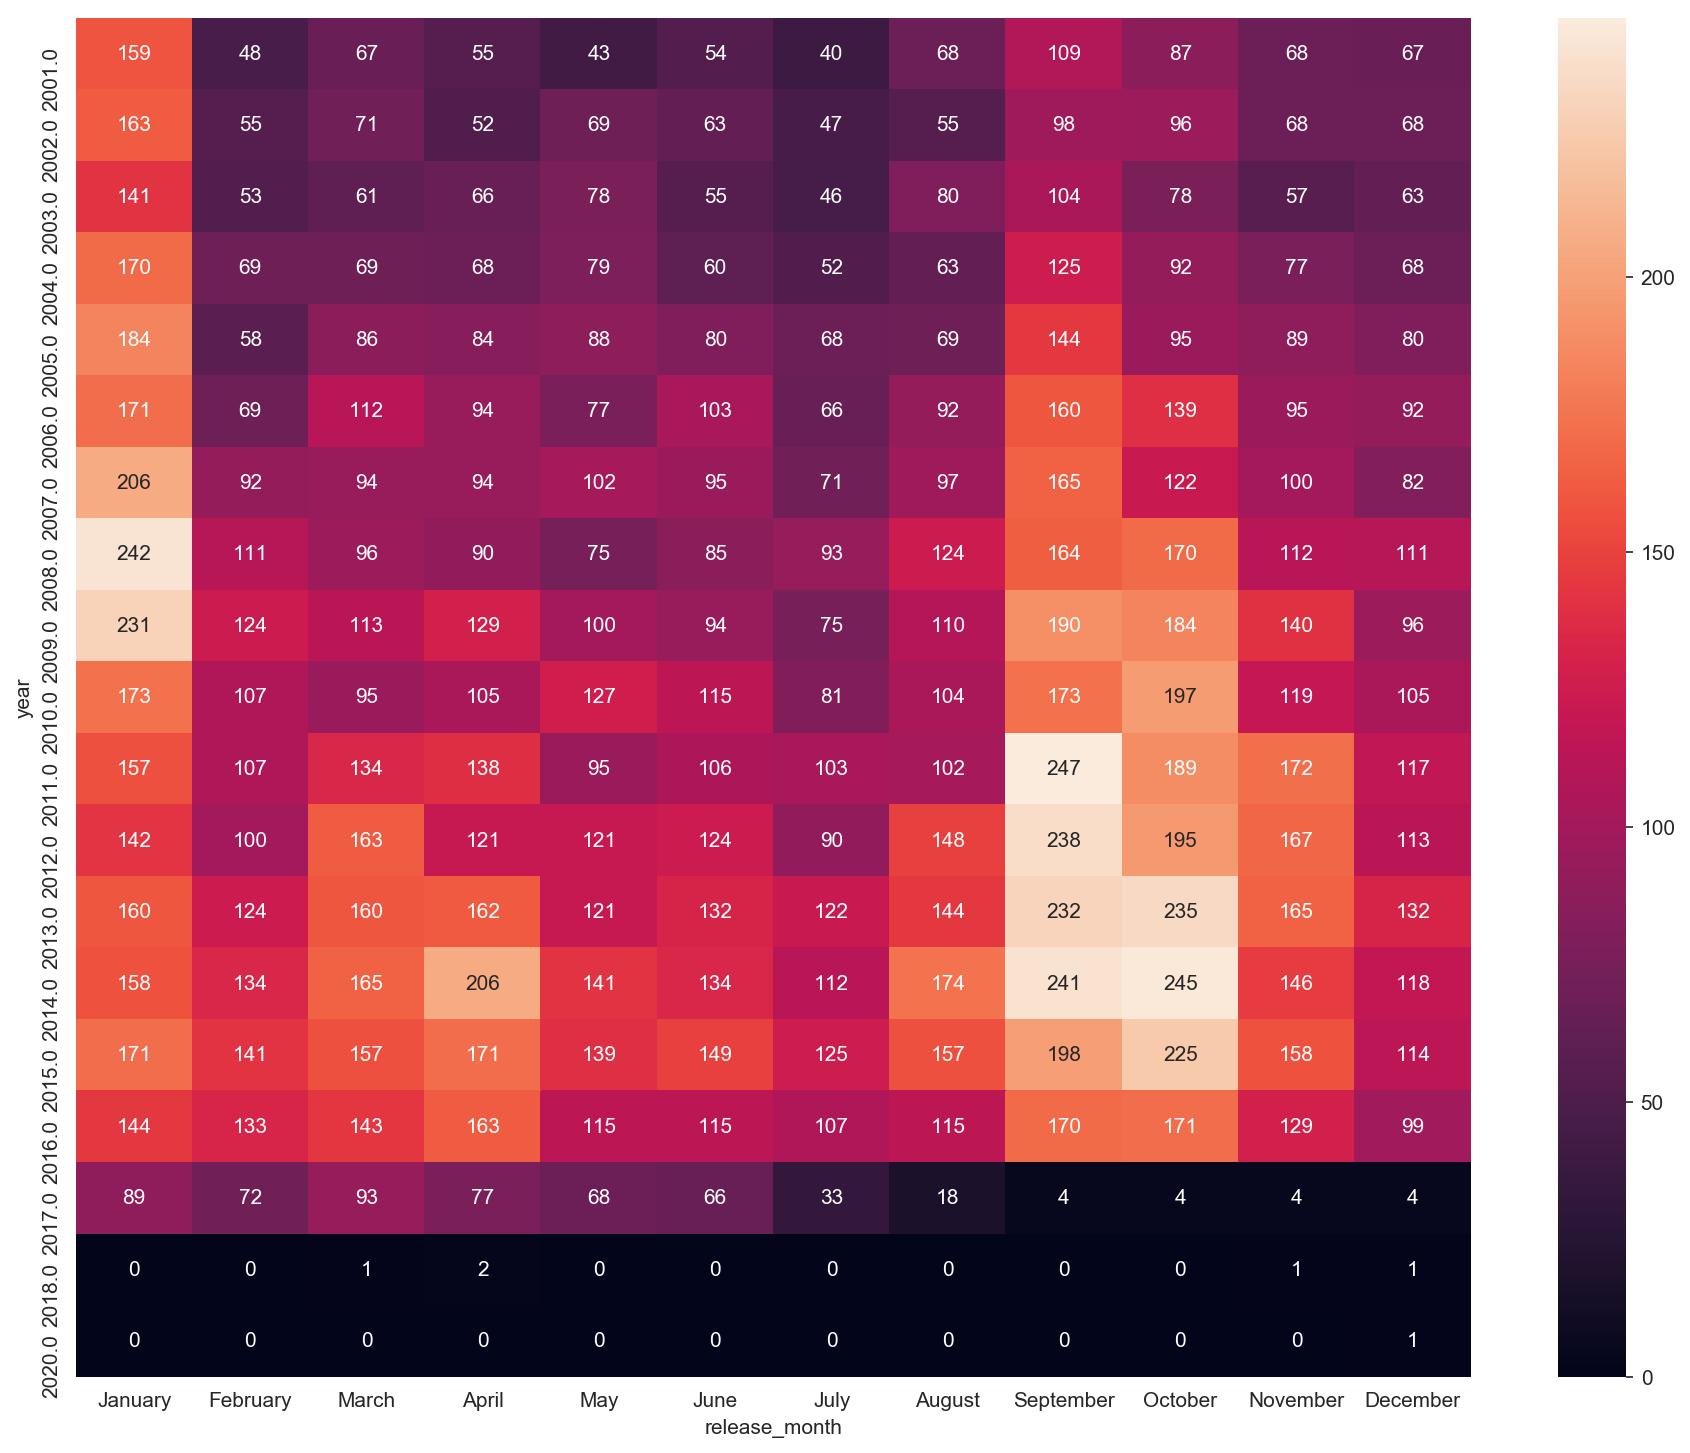

In [126]:
heat = heat.transpose()
plt.figure(figsize=(15,12),dpi=150)
sns.heatmap(heat,annot=True,fmt='n')

### Runtime

In [127]:
df['runtime'].describe()

count    45203.000000
mean        94.128199
std         38.407810
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

### Shortest movies

In [128]:
cm =df[df['runtime']>0].sort_values('runtime').head(10)[['poster_path','title','runtime','year']]
HTML(cm.to_html(escape=False))

,poster_path,title,runtime,year
35146,,La Vague,1.0,1891
36577,,Champs de Mars,1.0,1900
36576,,Palace of Electricity,1.0,1900
44965,,"Luis Martinetti, Contortionist",1.0,1894
42357,,A Gathering of Cats,1.0,2007
36575,,Eiffel Tower from Trocadero Palace,1.0,1900
36574,,Panorama of Eiffel Tower,1.0,1900
44714,,The Infernal Caldron,1.0,1903
19244,,The Kiss,1.0,1896
44646,,The Vanishing Lady,1.0,1896


#### Longest Movies

In [130]:
lm=df[df['runtime']>0].sort_values('runtime',ascending=False).head(10)[['poster_path','title','runtime','year']]
HTML(lm.to_html(escape=False))

,poster_path,title,runtime,year
24178,,Centennial,1256.0,1978
40938,,Baseball,1140.0,1994
19965,,Jazz,1140.0,2001
13767,,Berlin Alexanderplatz,931.0,1980
13953,,Heimat: A Chronicle of Germany,925.0,1984
27855,,The Story of Film: An Odyssey,900.0,2011
26682,,Taken,877.0,2002
19158,,The War,874.0,2007
34667,,The Roosevelts: An Intimate History,840.0,2014
34732,,Seventeen Moments in Spring,840.0,1973


__Actually these are not movies, but they are documentaries.__

### budget

In [131]:
df['budget'].describe()

count    8.890000e+03
mean     2.160428e+07
std      3.431063e+07
min      1.000000e+00
25%      2.000000e+06
50%      8.000000e+06
75%      2.500000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [132]:
b=df.sort_values('budget',ascending=False)[['poster_path','title','year','budget','revenue','return']].head(10)
HTML(b.to_html(escape=False))

,poster_path,title,year,budget,revenue,return
17124,,Pirates of the Caribbean: On Stranger Tides,2011,380000000.0,1.045714e+09,2.751878
11827,,Pirates of the Caribbean: At World's End,2007,300000000.0,9.610000e+08,3.203333
26558,,Avengers: Age of Ultron,2015,280000000.0,1.405404e+09,5.019299
11067,,Superman Returns,2006,270000000.0,3.910812e+08,1.448449
44842,,Transformers: The Last Knight,2017,260000000.0,6.049421e+08,2.326701
16130,,Tangled,2010,260000000.0,5.917949e+08,2.276134
18685,,John Carter,2012,260000000.0,2.841391e+08,1.092843
11780,,Spider-Man 3,2007,258000000.0,8.908716e+08,3.452991
21175,,The Lone Ranger,2013,255000000.0,8.928991e+07,0.350157
22059,,The Hobbit: The Desolation of Smaug,2013,250000000.0,9.584000e+08,3.833600


#### Apart from the lone ranger, John Carter every other big budget film in top 10 has been box office success.

/Users/suyashchavan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/Users/suyashchavan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



<function matplotlib.pyplot.show(*args, **kw)>

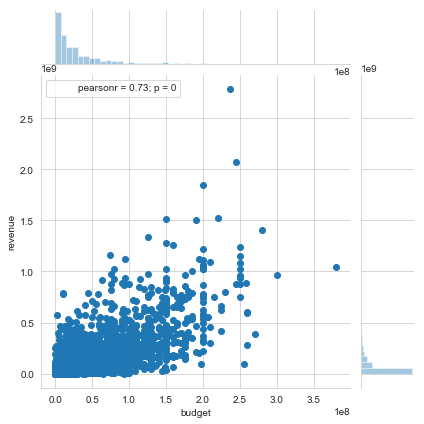

In [133]:
j = sns.jointplot(x='budget',y='revenue',data=df)
j.annotate(stats.pearsonr)
plt.show

### Pearson coefficient of 0.73 shows there is strong correlation between budget and revenue

### Highest grossing movies of all time

In [134]:
gross_top = df[['poster_path', 'title', 'budget', 'revenue', 'year']].sort_values('revenue', ascending=False).head(10)
HTML(gross_top.to_html(escape=False))

,poster_path,title,budget,revenue,year
14551,,Avatar,237000000.0,2.787965e+09,2009
26555,,Star Wars: The Force Awakens,245000000.0,2.068224e+09,2015
1639,,Titanic,200000000.0,1.845034e+09,1997
17818,,The Avengers,220000000.0,1.519558e+09,2012
25084,,Jurassic World,150000000.0,1.513529e+09,2015
28830,,Furious 7,190000000.0,1.506249e+09,2015
26558,,Avengers: Age of Ultron,280000000.0,1.405404e+09,2015
17437,,Harry Potter and the Deathly Hallows: Part 2,125000000.0,1.342000e+09,2011
22110,,Frozen,150000000.0,1.274219e+09,2013
42222,,Beauty and the Beast,160000000.0,1.262886e+09,2017


In [135]:
year_rev = df[df['revenue'].notnull()].groupby('year')['year','revenue'].max()
year_rev['revenue'].iplot(xrange=(1900,2020))

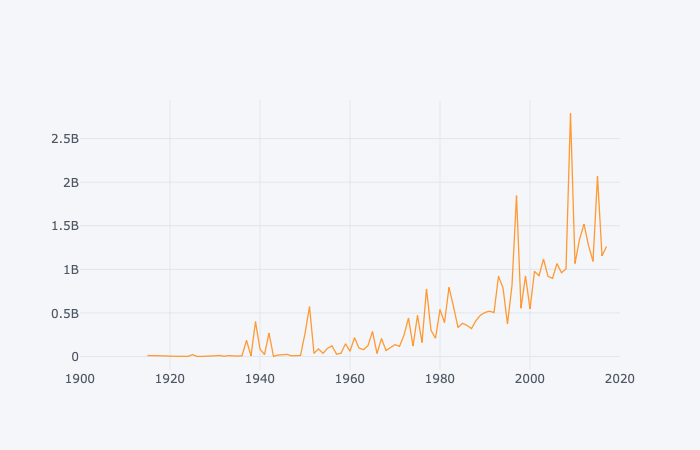

In [136]:
Image(filename='newplot-6.png')

### Most successful in terms of return

In [139]:
msm=df[df['budget']> 1e6][['poster_path','title','year','revenue','budget','return']].sort_values('return',ascending=False).head(15)
HTML(msm.to_html(escape=False))

,poster_path,title,year,revenue,budget,return
1003,,Alice in Wonderland,1951,572000000.0,3000000.0,190.666667
587,,Snow White and the Seven Dwarfs,1937,184925486.0,1488423.0,124.242561
893,,Gone with the Wind,1939,400176459.0,4000000.0,100.044115
21344,,Lost in Thailand,2012,208000000.0,2200000.0,94.545455
2542,,The Rocky Horror Picture Show,1975,112892319.0,1200000.0,94.076932
993,,Cinderella,1950,263591415.0,2900000.0,90.893591
8230,,Saw,2004,103911669.0,1200000.0,86.593058
1065,,E.T. the Extra-Terrestrial,1982,792965326.0,10500000.0,75.520507
5165,,My Big Fat Greek Wedding,2002,368744044.0,5000000.0,73.748809
1563,,The Full Monty,1997,257850122.0,3500000.0,73.671463


1951's Alice in Wonderland is the most successfull movie in terms of returns

### Box office Disasters

In [140]:
bod= df[df['budget']> 1e6][['poster_path','title','year','revenue','budget','return']].sort_values('return',ascending=True).head(10)
HTML(bod.to_html(escape=False))

,poster_path,title,year,revenue,budget,return
7016,,Chasing Liberty,2004,12.0,23000000.0,5.217391e-07
8107,,The Cookout,2004,12.0,16000000.0,7.500000e-07
2663,,Never Talk to Strangers,1995,6.0,6400000.0,9.375000e-07
12946,,To Rob a Thief,2007,6.0,4002313.0,1.499133e-06
17527,,Deadfall,1993,18.0,10000000.0,1.800000e-06
6736,,In the Cut,2003,23.0,12000000.0,1.916667e-06
2882,,Dreaming of Joseph Lees,1999,7.0,2000000.0,3.500000e-06
11918,,Death at a Funeral,2007,46.0,9000000.0,5.111111e-06
11653,,Zyzzyx Road,2006,30.0,2000000.0,1.500000e-05
22271,,A Perfect Man,2013,388.0,5000000.0,7.760000e-05


Well these movies are so bad, I have never heard of them, well no wonder they are box office disasters

## Genre

In [141]:
df['genres'] = df['genres'].apply(ast.literal_eval)
df['genres'] = df['genres'].apply(lambda x: [i['name']for i in x] if isinstance(x,list) else np.nan)
s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
genre_df = df.drop('genres',axis=1).join(s)
pop_df = pd.DataFrame(genre_df['genre'].value_counts())
pop_df.head(10)

,genre
Drama,20265
Comedy,13182
Thriller,7624
Romance,6735
Action,6596
Horror,4673
Crime,4307
Documentary,3932
Adventure,3496
Science Fiction,3049


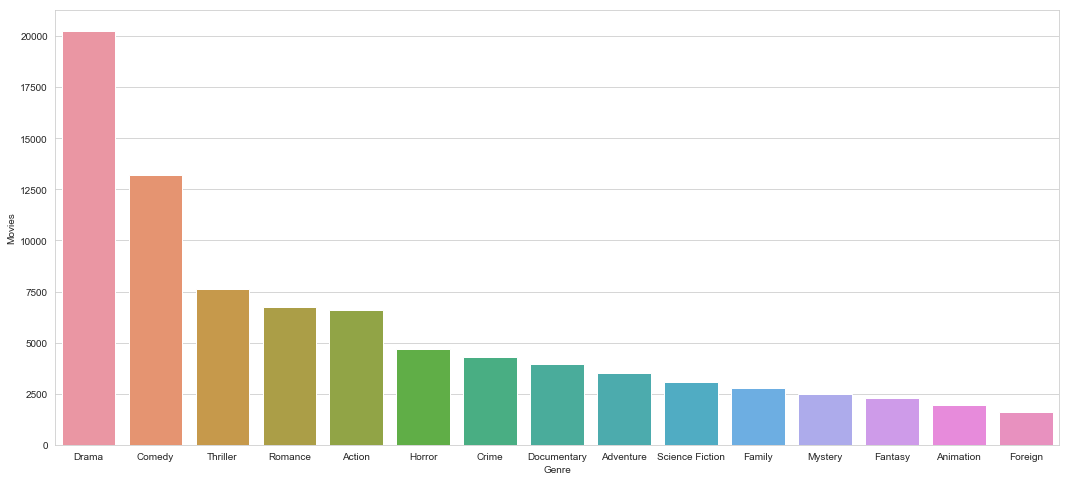

In [142]:
pop_df = pop_df.reset_index()
pop_df.columns = ['Genre','Movies']

plt.figure(figsize=(18,8))
sns.barplot(x='Genre', y='Movies', data=pop_df.head(15))

In [143]:
genres = ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime', 'Adventure', 'Science Fiction', 
          'Mystery', 'Fantasy', 'Mystery', 'Animation']

In [148]:
genre_df['year'] = genre_df['year'].apply(lambda x:int(x) if x!='nan' else np.nan)

In [149]:
pop_gen_movies = genre_df[(genre_df['genre'].isin(genres)) & (genre_df['year'] >= 2000.0) & (genre_df['year'] <= 2017.0)]

In [150]:
ctab = pd.crosstab([pop_gen_movies['year']], pop_gen_movies['genre'])
ctab

genre,Action,Adventure,Animation,Comedy,Crime,Drama,Fantasy,Horror,Mystery,Romance,Science Fiction,Thriller
year,,,,,,,,,,,,
2000.0,109,47,44,260,74,394,39,66,42,155,46,137
2001.0,150,64,42,270,86,408,51,64,42,162,68,156
2002.0,161,72,50,270,93,456,47,68,62,153,69,183
2003.0,150,70,47,297,88,395,34,71,42,138,64,182
2004.0,155,82,47,307,76,494,45,96,47,167,66,167
2005.0,156,70,48,347,98,563,62,113,57,189,62,195
2006.0,173,96,74,377,114,596,72,150,70,200,73,268
2007.0,189,80,71,371,127,620,63,169,61,197,74,250
2008.0,233,119,79,410,121,655,73,180,83,190,92,285


In [151]:
ctab= ctab.apply(lambda x:x/x.sum(),axis=1)
ctab

genre,Action,Adventure,Animation,Comedy,Crime,Drama,Fantasy,Horror,Mystery,Romance,Science Fiction,Thriller
year,,,,,,,,,,,,
2000.0,0.077141,0.033263,0.031139,0.184006,0.052371,0.278839,0.027601,0.046709,0.029724,0.109696,0.032555,0.096957
2001.0,0.095969,0.040947,0.026871,0.172745,0.055022,0.261036,0.032630,0.040947,0.026871,0.103647,0.043506,0.099808
2002.0,0.095606,0.042755,0.029691,0.160333,0.055226,0.270784,0.027910,0.040380,0.036817,0.090855,0.040974,0.108670
2003.0,0.095057,0.044360,0.029785,0.188213,0.055767,0.250317,0.021546,0.044994,0.026616,0.087452,0.040558,0.115336
2004.0,0.088622,0.046884,0.026872,0.175529,0.043453,0.282447,0.025729,0.054889,0.026872,0.095483,0.037736,0.095483
2005.0,0.079592,0.035714,0.024490,0.177041,0.050000,0.287245,0.031633,0.057653,0.029082,0.096429,0.031633,0.099490
2006.0,0.076447,0.042422,0.032700,0.166593,0.050376,0.263367,0.031816,0.066284,0.030932,0.088378,0.032258,0.118427
2007.0,0.083187,0.035211,0.031250,0.163292,0.055898,0.272887,0.027729,0.074384,0.026849,0.086708,0.032570,0.110035
2008.0,0.092460,0.047222,0.031349,0.162698,0.048016,0.259921,0.028968,0.071429,0.032937,0.075397,0.036508,0.113095


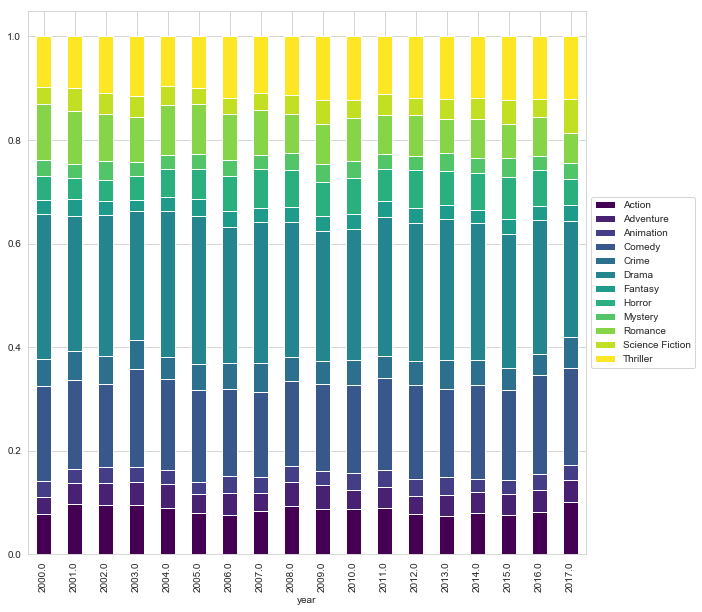

In [152]:
ctab.plot(kind='bar',stacked=True,figsize=(10,10),colormap='viridis')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

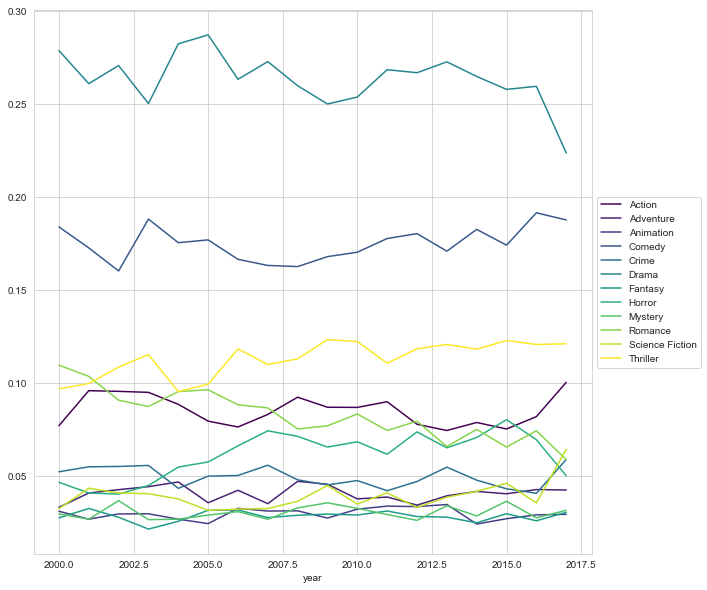

In [153]:
ctab.plot(kind='line',stacked=False,figsize=(10,10),colormap='viridis')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Cast and Crew

In [154]:
credits_df = pd.read_csv('credits.csv')

In [155]:
credits_df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender'...","[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, '...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a36847f80a7c73', 'gender': ...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'department': 'Production', 'gender': 2, 'id': 511, '...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'credit_id': '52fe466a9251416c75077a8d', 'gender': 2...","[{'credit_id': '52fe466a9251416c75077a89', 'department': 'Directing', 'gender': 2, 'id': 26502, ...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah' Jackson"", 'credit_id': '52fe44779251416c91011aad...","[{'credit_id': '52fe44779251416c91011acb', 'department': 'Directing', 'gender': 2, 'id': 2178, '...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', 'credit_id': '52fe44959251416c75039eb9', 'gender': ...","[{'credit_id': '52fe44959251416c75039ed7', 'department': 'Sound', 'gender': 2, 'id': 37, 'job': ...",11862


In [156]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [157]:
credits_df['id'] = credits_df['id'].apply(convert_int)

In [158]:
df['id'] = df['id'].apply(convert_int)
df = df.merge(credits_df,on='id')

In [159]:
df['cast'] = df['cast'].apply(ast.literal_eval)
df['crew'] = df['crew'].apply(ast.literal_eval)

df['cast_size'] = df['cast'].apply(lambda x:len(x))
df['crew_size'] = df['crew'].apply(lambda x:len(x))

In [160]:
df['cast'] = df['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x,list) else np.nan)

In [161]:
def get_director(x):
    
    for i in x:
        if i['job']== 'Director':
            return i['name']
    else:
            return np.nan
        

In [162]:
df['director'] = df['crew'].apply(get_director)

In [163]:
s = df.apply(lambda x: pd.Series(x['cast']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'actor'
cast_df = df.drop('cast', axis=1).join(s)

### Actors with highest total revenue

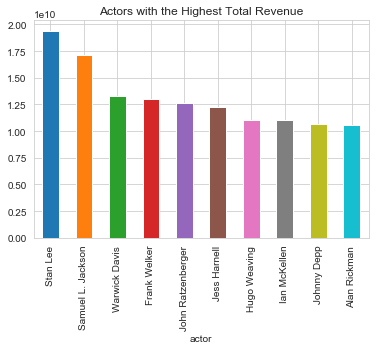

In [164]:
plt.title('Actors with the Highest Total Revenue')
cast_df.groupby('actor')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

### Director with highest total revenue

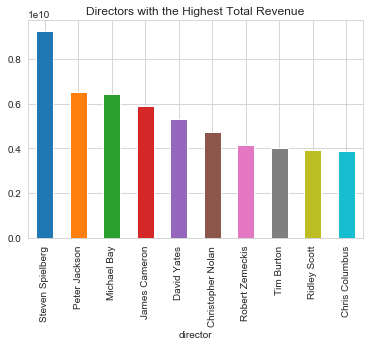

In [165]:
plt.title('Directors with the Highest Total Revenue')
df.groupby('director')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

For average revenues, we will consider only actors and directors who have acted and directed in at least 5 movies respectively.

In [166]:
actor_list = cast_df.groupby('actor')['revenue'].count().sort_values(ascending=False)
actor_list = list(actor_list[actor_list>5].index)

In [167]:
director_list = df.groupby('director')['revenue'].count().sort_values(ascending=False)
director_list = list(director_list[director_list >= 5].index)

### Actors with highest average revenue

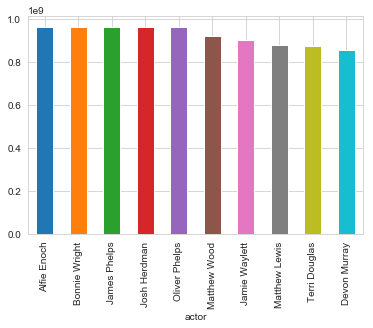

In [168]:
cast_df[cast_df['actor'].isin(actor_list)].groupby('actor')['revenue'].mean().sort_values(ascending=False).head(10).plot(kind='bar')

### Director with highest avg.revenue

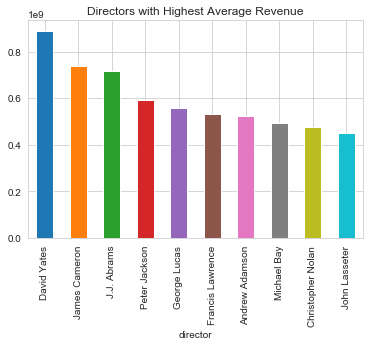

In [170]:
plt.title("Directors with Highest Average Revenue")
df[df['director'].isin(director_list)].groupby('director')['revenue'].mean().sort_values(ascending=False).head(10).plot(kind='bar')

# Revenue Prediction

In [171]:
rgf = df[df['return'].notnull()]

In [172]:
rgf.shape,rgf.columns

((5393, 30),
 Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
        'original_language', 'overview', 'popularity', 'poster_path',
        'production_companies', 'production_countries', 'release_date',
        'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
        'video', 'vote_average', 'vote_count', 'return', 'year',
        'release_month', 'day_of_week', 'cast', 'crew', 'cast_size',
        'crew_size', 'director'],
       dtype='object'))

In [173]:
rgf = rgf.drop(['id', 'overview', 'poster_path', 'release_date', 'status', 'tagline', 'video', 'return', 'crew'], 
               axis=1)

We will perform the following feature engineering tasks:

belongs_to_collection will be turned into a Boolean variable. 1 indicates a movie is a part of collection whereas 0 indicates it is not.

genres will be converted into number of genres.

homepage will be converted into a Boolean variable that will indicate if a movie has a homepage or not.

original_language will be replaced by a feature called is_foreign to denote if a particular film is in English or a Foreign Language.

production_companies will be replaced with just the number of production companies collaborating to make the movie.

production_countries will be replaced with the number of countries the film was shot in.

day will be converted into a binary feature to indicate if the film was released on a Friday.

month will be converted into a variable that indicates if the month was a holiday season.

In [174]:
s = rgf.apply(lambda x:pd.Series(x['genres']),axis=1).stack().reset_index(level=1,drop=True)
s.name = 'genre'
gen_rgf = rgf.drop('genres',axis=1).join(s)
genres_train= gen_rgf['genre'].drop_duplicates()

In [202]:
genres_train=  list(gen_rgf['genre'].unique())
len(genres_train)

21

In [203]:
def feature_engineering(df):
    df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x: 0 if x==np.nan else 1)
    
    for genre in genres_train:
        df['is_' + str(genre)] = df['genres'].apply(lambda x: 1 if genre in x else 0)
        
    df['genres'] = df['genres'].apply(lambda x:len(x))
    df['homepage'] = df['homepage'].apply(lambda x:0 if x==np.nan else 1)
    df['is_english'] = df['original_language'].apply(lambda x: 1 if x=='en' else 0)
    df = df.drop('original_language',axis=1)
    df['production_companies'] = df['production_companies'].apply(lambda x:len(x))
    df['production_countries'] = df['production_countries'].apply(lambda x:len(x))
    df['is_friday'] = df['day_of_week'].apply(lambda x:1 if x=='Friday' else 0)
    df = df.drop('day_of_week',axis=1)
    df['is_holiday'] = df['release_month'].apply(lambda x:1 if x in ['April','May','June','December'] else 0)
    df = df.drop('release_month',axis=1)
    df = df.drop(['title','cast','director','spoken_languages'],axis=1)
    df = pd.get_dummies(df,prefix='is')
    df['runtime'] = df['runtime'].fillna(df['runtime'].mean())
    df['vote_average'] = df['vote_average'].fillna(df['vote_average'].mean())
    return df

In [204]:
X, y = rgf.drop('revenue', axis=1), rgf['revenue']

In [205]:
X = feature_engineering(X)

In [206]:
X.shape

(5393, 37)

In [207]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25)

In [208]:
reg = GradientBoostingRegressor()
reg.fit(train_X, train_y)
reg.score(test_X, test_y)

0.7656785544138549

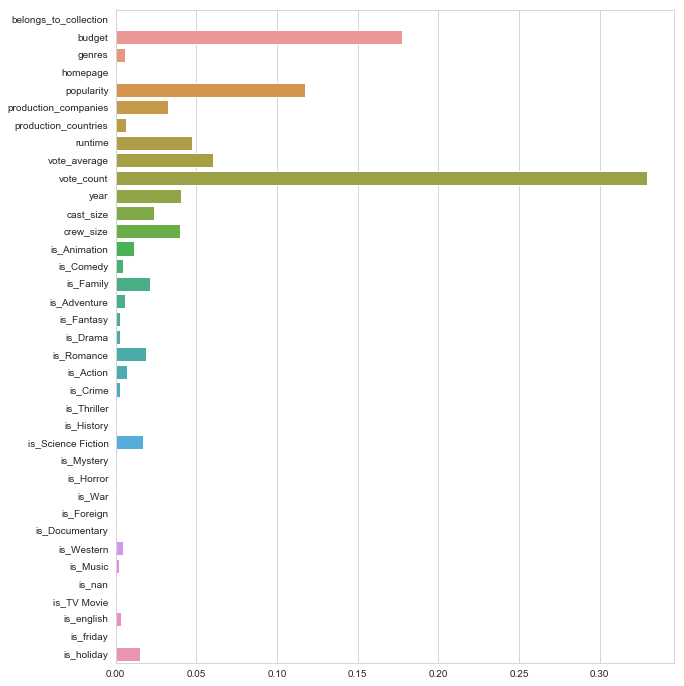

In [209]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,12))
sns.barplot(x=reg.feature_importances_, y=X.columns)

## Classification: Predicting movie success

In [210]:
cls = df[df['return'].notnull()]
cls.shape,cls.columns

((5393, 30),
 Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
        'original_language', 'overview', 'popularity', 'poster_path',
        'production_companies', 'production_countries', 'release_date',
        'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
        'video', 'vote_average', 'vote_count', 'return', 'year',
        'release_month', 'day_of_week', 'cast', 'crew', 'cast_size',
        'crew_size', 'director'],
       dtype='object'))

In [211]:
cls = cls.drop(['id', 'overview', 'poster_path', 'release_date', 'status','spoken_languages', 'tagline', 'revenue'], axis=1)

### First we need to convert return function to binary, for success we will put return of 1.5 as threshold

In [212]:
cls['return'] = cls['return'].apply(lambda x: 1 if x>=1.5 else 0)

In [213]:
cls['return'].value_counts()

1    3208
0    2185
Name: return, dtype: int64

In [214]:
cls['belongs_to_collection'] = cls['belongs_to_collection'].fillna('').apply(lambda x: 0 if x == '' else 1)

/Users/suyashchavan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



(0, 1)

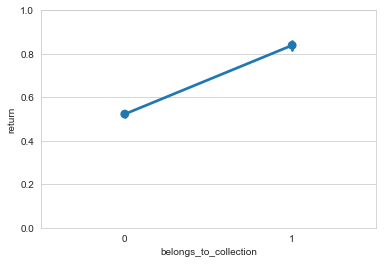

In [215]:
sns.pointplot(x='belongs_to_collection',y='return',data=cls)
plt.ylim(0,1)

#### pointplot shows that there is higher probability that movie will be successful if it belong to a collection

In [216]:
s = cls.apply(lambda x:pd.Series(x['genres']),axis=1).stack().reset_index(level=1,drop=True)
s.name='genre'
gen_cls = cls.drop('genres',axis=1).join(s)
gen_ctab = pd.crosstab(index=gen_cls['genre'],columns=gen_cls['return'],dropna=False)
gen_ctab = gen_ctab.apply(lambda x:x/x.sum(),axis=1)
gen_ctab

return,0,1
genre,,
Action,0.396613,0.603387
Adventure,0.346791,0.653209
Animation,0.294915,0.705085
Comedy,0.389968,0.610032
Crime,0.422454,0.577546
Documentary,0.389831,0.610169
Drama,0.455877,0.544123
Family,0.315299,0.684701
Fantasy,0.366472,0.633528


<Figure size 576x432 with 0 Axes>

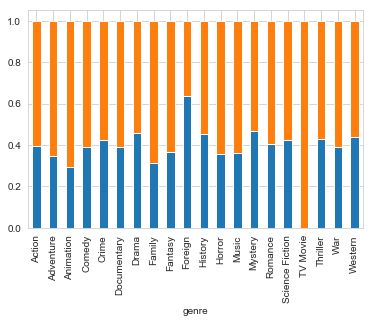

In [217]:
ctab = pd.crosstab([gen_cls['genre']], gen_cls['return'], dropna=False).apply(lambda x: x/x.sum(), axis=1)
plt.figure(figsize=(8,6))
ctab.plot(kind='bar', stacked=True, legend=False)

In [259]:
def classification_engineering(df):
    
    df = df.drop('homepage', axis=1)
    for genre in genres_train:
        df['is_' + str(genre)] = df['genres'].apply(lambda x: 1 if genre in x else 0)
    df = df.drop('genres',axis=1)
    
    df['is_english'] = df['original_language'].apply(lambda x: 1 if x=='en' else 0)
    df = df.drop('original_language', axis=1)
    df['production_companies'] = df['production_companies'].apply(lambda x: len(x))
    df['production_countries'] = df['production_countries'].apply(lambda x: len(x))
    df['is_Friday'] = df['day_of_week'].apply(lambda x: 1 if x=='Friday' else 0)
    df = df.drop('day_of_week', axis=1)
    df['is_Holiday'] = df['release_month'].apply(lambda x: 1 if x in ['April', 'May', 'June', 'November','December'] else 0)
    df = df.drop('release_month', axis=1)
    df = df.drop(['title', 'cast', 'director','year','video'], axis=1)
    #df = pd.get_dummies(df, prefix='is')
    df['runtime'] = df['runtime'].fillna(df['runtime'].mean())
    df['vote_average'] = df['vote_average'].fillna(df['vote_average'].mean())
    df = df.drop('crew', axis=1)
    return df

In [260]:
cl = classification_engineering(cls)

In [261]:
cl.shape

(5393, 35)

In [262]:
X, y = cl.drop('return', axis=1), cl['return']

In [263]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25)

In [264]:
from sklearn.ensemble import RandomForestClassifier

In [265]:
clf = RandomForestClassifier()
clf.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [266]:
predictions = clf.predict(test_X)

In [267]:
from sklearn import metrics

In [268]:
metrics.confusion_matrix(test_y,predictions)

array([[376, 180],
       [217, 576]])

In [269]:
metrics.accuracy_score(test_y,predictions)

0.7057079318013343

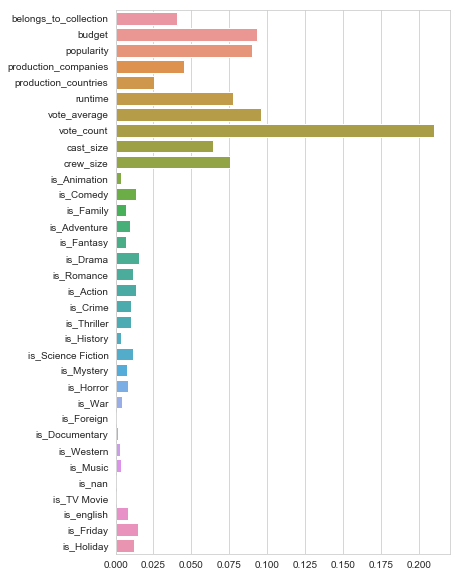

In [270]:
plt.figure(figsize=(6,10))
sns.barplot(x=clf.feature_importances_,y=X.columns)